In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.visualization import plot_distribution

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)

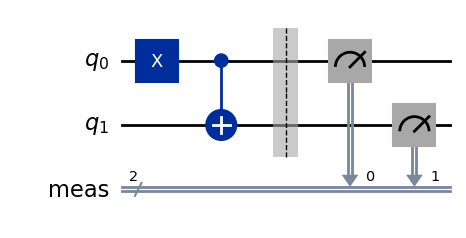

In [15]:
#initializing  quantum circuit



qc = QuantumCircuit(2)   #For a CNOT gate we need 2 qubits

qc.x(0) #change q0 from |0> to |1>

qc.cx(0, 1)

qc.measure_all()

qc.draw("mpl")

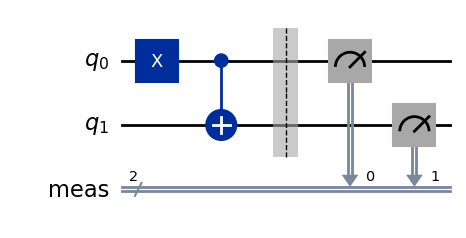

In [16]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")




In [17]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results  


#counts
print('RESULT ', counts)


RESULT  {'11': 1000}


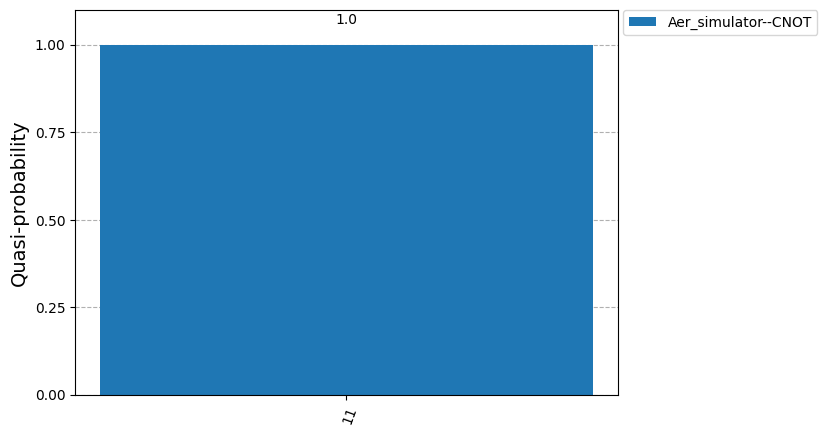

In [18]:
plot_distribution([counts], legend = ['Aer_simulator--CNOT'])

Since we have changed q0 from |0> to |1>, when applying CNOT in QC, we will always obtain  the result `11`